In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...,NaN,NaN,NaN
616,ham,He like not v shock leh. Cos telling shuhui is...,NaN,NaN,NaN
4800,ham,The guy at the car shop who was flirting with ...,NaN,NaN,NaN
700,ham,How much r Ì_ willing to pay?,NaN,NaN,NaN
1488,ham,Tell them no need to investigate about me anyw...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
sd_df = df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [8]:
sd_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
sd_df.columns = ['spam','text']

In [11]:
sd_df.sample(5)

,spam,text
1176,ham,"Did he say how fantastic I am by any chance, o..."
3122,ham,He telling not to tell any one. If so treat fo...
4026,ham,"Yes, princess. Are you going to make me moan?"
643,ham,Ya very nice. . .be ready on thursday
3396,ham,Heehee that was so funny tho


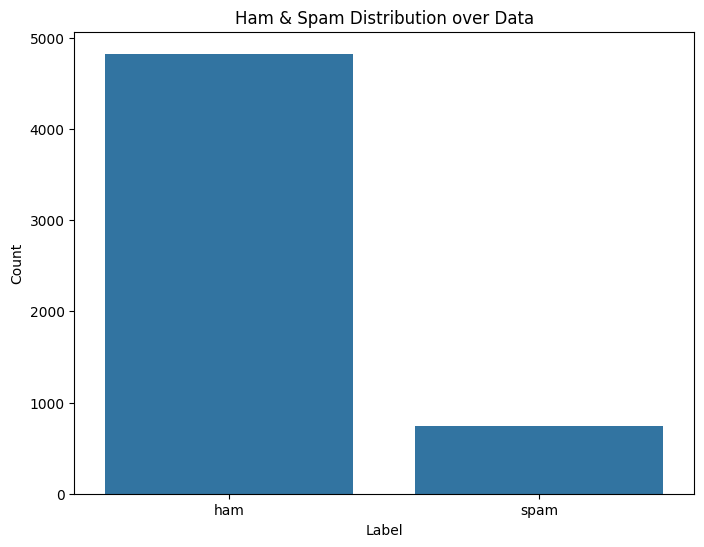

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=sd_df, x='spam')
plt.title('Ham & Spam Distribution over Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Encoding the spam column using one hot encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le.fit(sd_df['spam'])

LabelEncoder()

In [17]:
sd_df['spam']=le.transform(sd_df['spam'])

In [18]:
sd_df.head()

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\ankur\AppData\Local\Temp\ipykernel_7064\2518133464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd_df['spam'])


<Axes: xlabel='spam', ylabel='Density'>

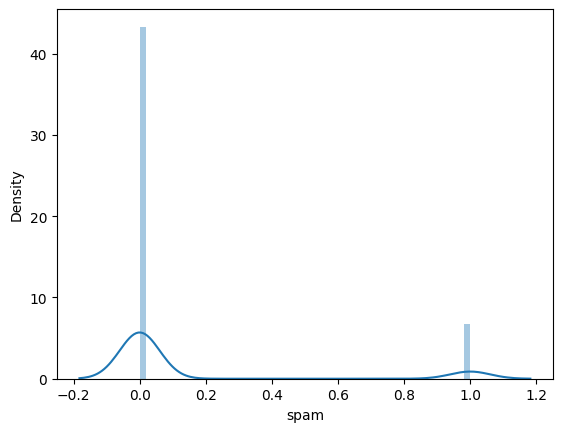

In [19]:
sns.distplot(sd_df['spam'])

In [20]:
sd_df.describe()

,spam
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Splitting the data in train, test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(sd_df['text'],sd_df['spam'],test_size = 0.25, random_state=40)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((4179,), (1393,), (4179,), (1393,))

### Tf-Idf Vectorizor

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tf = TfidfVectorizer(stop_words='english')

In [32]:
x_train_tf = tf.fit_transform(x_train)
x_test_tf = tf.transform(x_test)

In [33]:
x_train_tf

<4179x7320 sparse matrix of type '<class 'numpy.float64'>'
	with 32801 stored elements in Compressed Sparse Row format>

## Training and Testing Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
sd_model = LogisticRegression()

In [34]:
sd_model.fit(x_train_tf,y_train)

LogisticRegression()

In [35]:
prediction = sd_model.predict(x_test_tf)

In [36]:
prediction

array([0, 1, 0, ..., 1, 0, 0])

### Evaluating the accuracy of model

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
accuracy = accuracy_score(y_test,prediction)

In [41]:
accuracy*100

96.69777458722182

In [42]:
confusion_mat = confusion_matrix(y_test,prediction)

In [43]:
confusion_mat

array([[1206,    2],
       [  44,  141]], dtype=int64)

### Dumping the Model

In [53]:
import pickle

In [54]:
pickle.dump(sd_model,open('spam_detection_Model.pkl','wb'))

#### cleaning the text

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin

In [65]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [61]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self._clean_text(text) for text in X]
    
    def _clean_text(self, text):
        text = text.lower()
        text = nltk.word_tokenize(text)
        
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
        
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
                
        text = y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
        text = " ".join(y)

        return text

### Creating Pipeline for model 

In [55]:
from sklearn.pipeline import Pipeline, make_pipeline

In [56]:
from sklearn import set_config
set_config(display='diagram')

In [62]:
trf3 = LogisticRegression()
text_cleaner = TextCleaner()
tfivec = TfidfVectorizer(stop_words='english', max_features=100000)

In [63]:
pipe = Pipeline([
    ('text_cleaner',text_cleaner),
    ('vectorizer',tfivec),
    ('classifier',trf3 )
])

In [66]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('text_cleaner', TextCleaner()),
                ('vectorizer',
                 TfidfVectorizer(max_features=100000, stop_words='english')),
                ('classifier', LogisticRegression())])

In [67]:
predict =  pipe.predict(x_test)

In [68]:
predict

array([0, 1, 0, ..., 1, 0, 0])

In [69]:
acc = accuracy_score(y_test,predict)

In [70]:
acc*100

96.62598707824839

In [72]:
pickle.dump(pipe,open('sd_pipeline_model.pkl','wb'))